# 1-age: age in years
# 2-sex: sex (1 = male; 0 = female)
# 3-cp: chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic
# 4-trestbps: resting blood pressure (in mm Hg on admission to the hospital)
# 5-chol: serum cholestoral in mg/dl
# 6-fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
# 7-restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
# 8-thalach: maximum heart rate achieved
# 9-exang: exercise induced angina (1 = yes; 0 = no)
# 10-oldpeak = ST depression induced by exercise relative to rest
# 11- slope: the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping
# 12-ca: number of major vessels (0-3) colored by flourosopy
# 13-thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
#14-label
--condition: 0 = no disease, 1 = disease
#Acknowledgements
Data posted on Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci
Description of the data above: https://www.kaggle.com/ronitf/heart-disease-uci/discussion/105877
Original data https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:
Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbr
Creators:
Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
Donor: David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Scikitlearn Models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier

#Model Evaluation

from sklearn.metrics import confusion_matrix, classification_report, precision_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV


In [2]:
data = pd.read_csv("/content/heart_cleveland_upload.csv")
df = data.copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [4]:
df.shape

(297, 14)

In [5]:
# We have not any missing values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

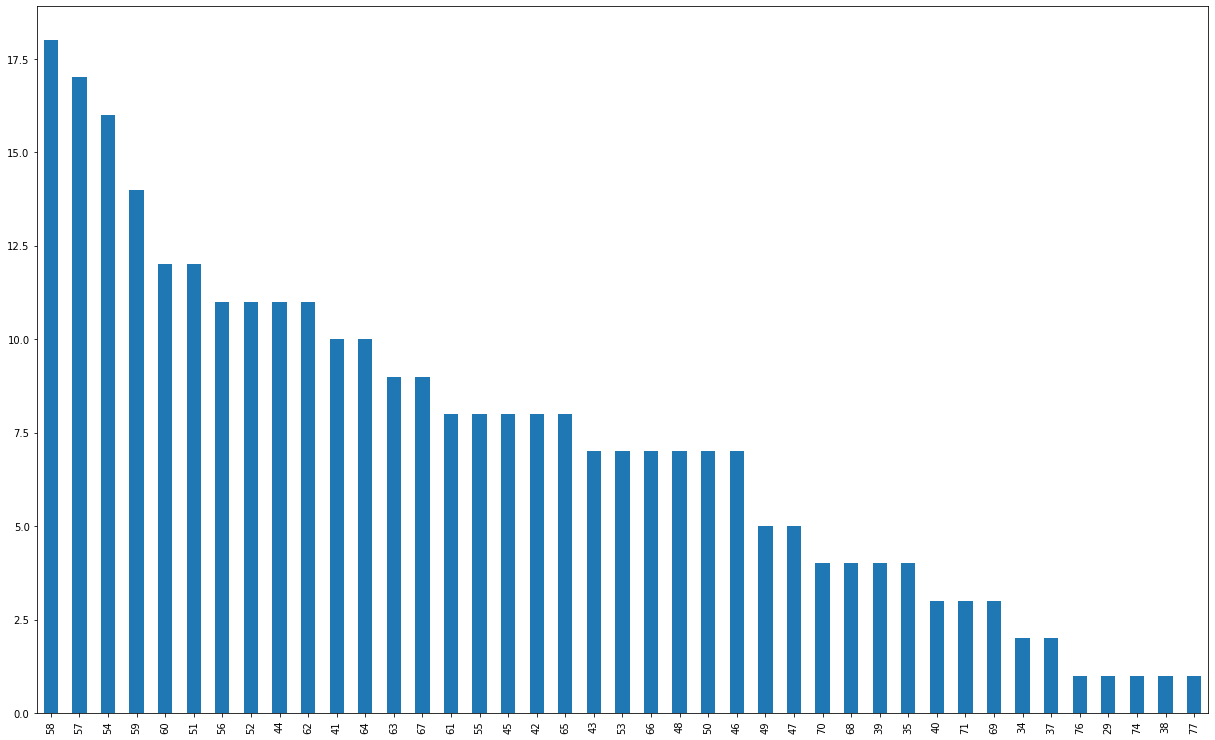

In [6]:
plt.figure(figsize=(21,13))
df["age"].value_counts().sort_values(ascending=False).plot.bar();


In [7]:
df["age"].describe().T

count    297.000000
mean      54.542088
std        9.049736
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

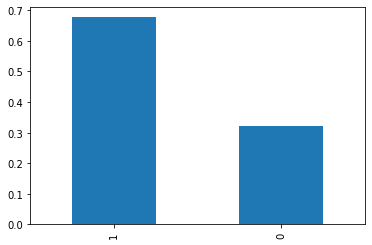

In [8]:
# male : %68
# female : %32
df["sex"].value_counts(normalize=True).plot.bar();

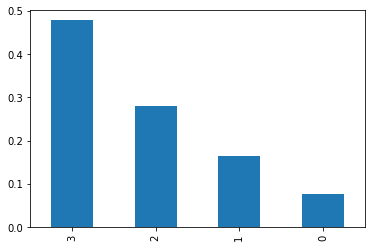

In [9]:
df["cp"].value_counts(normalize=True).plot.bar();


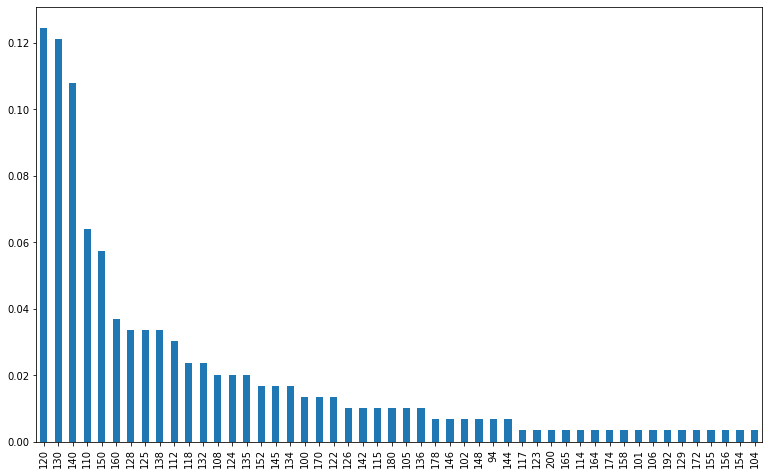

In [10]:
plt.figure(figsize=(13,8))
df["trestbps"].value_counts(normalize=True).plot.bar();

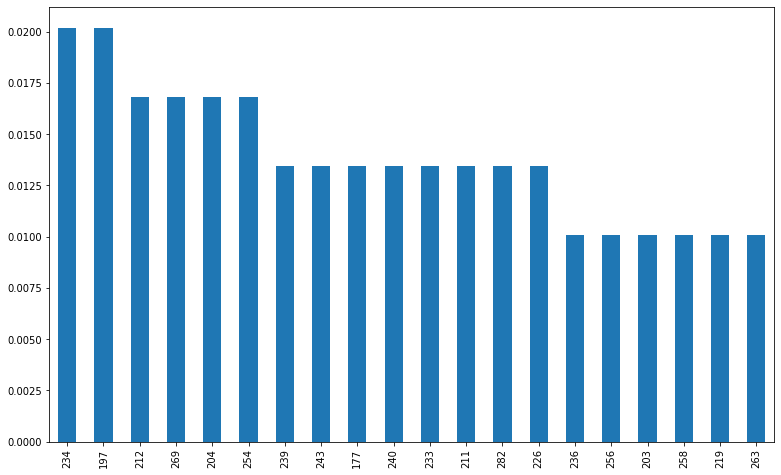

In [11]:
plt.figure(figsize=(13,8))
df["chol"].value_counts(normalize=True).head(20).plot.bar();

In [12]:
df["chol"].describe().T

count    297.000000
mean     247.350168
std       51.997583
min      126.000000
25%      211.000000
50%      243.000000
75%      276.000000
max      564.000000
Name: chol, dtype: float64

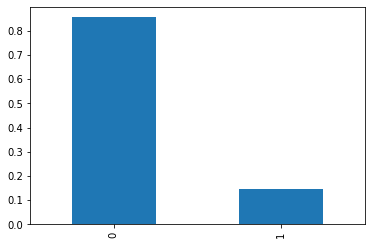

In [13]:
# % 86 > 120(fasting blood sugar)
df["fbs"].value_counts(normalize=True).plot.bar();

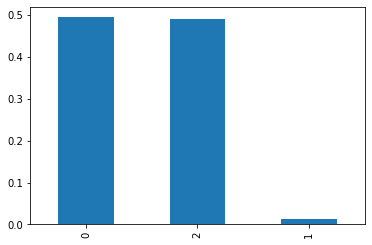

In [14]:
# resting electrocardiographic results 
 # % 49 normal, % 49 showing probable or definite left ventricular hypertrophy by Estes' criteria
df["restecg"].value_counts(normalize=True).plot.bar();

In [15]:
# maximum heart rate achieved
df["thalach"].describe().T

count    297.000000
mean     149.599327
std       22.941562
min       71.000000
25%      133.000000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

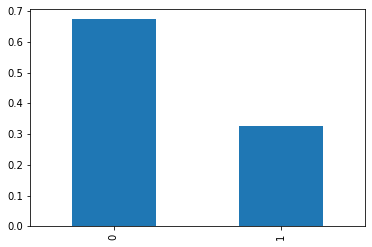

In [16]:
# exercise induced angina (%33 = yes; %67 = no)
df["exang"].value_counts(normalize=True).plot.bar();

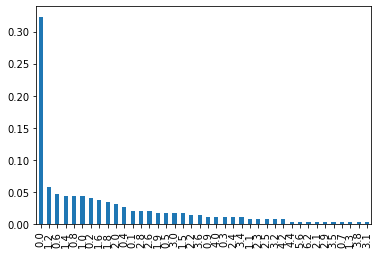

In [17]:
#ST depression induced by exercise relative to rest
df["oldpeak"].value_counts(normalize=True).plot.bar();

In [18]:
df["oldpeak"].describe().T

count    297.000000
mean       1.055556
std        1.166123
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

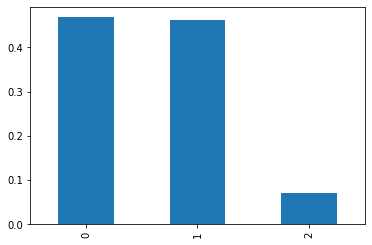

In [19]:
#  the slope of the peak exercise ST segment
# upsloping: %47 --flat: %46 --downsloping: %7
df["slope"].value_counts(normalize=True).plot.bar();

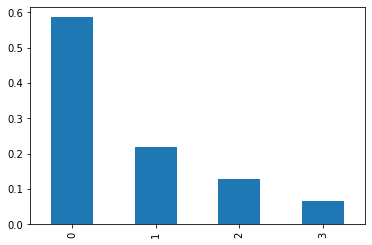

In [20]:
# number of major vessels (0-3) colored by flourosopy
df["ca"].value_counts(normalize=True).plot.bar();

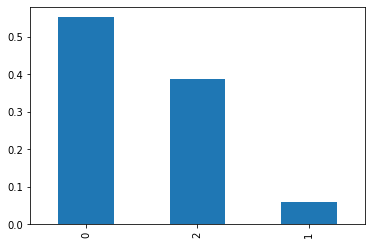

In [21]:
# thal:normal=%55;fixed defect = %39;reversable defect=%6
df["thal"].value_counts(normalize=True).plot.bar();

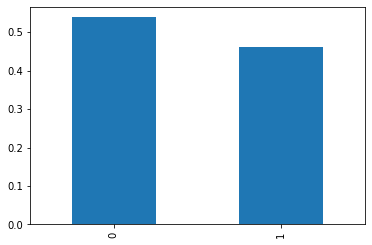

In [22]:
# disease:%54; no disease=%46
df["condition"].value_counts(normalize=True).plot.bar();

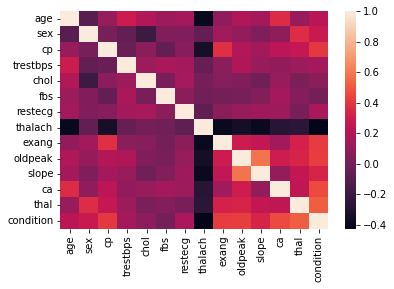

In [23]:
sns.heatmap(df.corr());

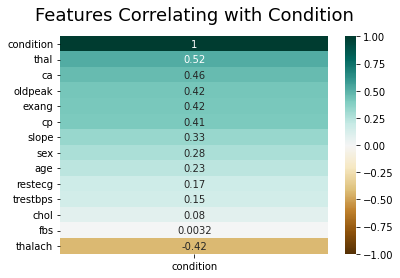

In [24]:
heatmap = sns.heatmap(df.corr()
[['condition']].
sort_values(by='condition', ascending=False), 
vmin=-1, 
vmax=1, 
annot=True, 
cmap='BrBG')

heatmap.set_title('Features Correlating with Condition', 
                   fontdict={'fontsize':18}, pad=16);

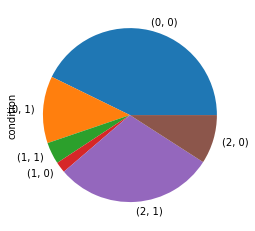

In [25]:
df.groupby(["thal"])["condition"].value_counts().plot.pie();

In [26]:
# we can see that especiallay thal = 0 (normal) is less diseased
df.groupby(["thal"])["condition"].value_counts(normalize=True)

thal  condition
0     0            0.774390
      1            0.225610
1     1            0.666667
      0            0.333333
2     1            0.765217
      0            0.234783
Name: condition, dtype: float64

In [27]:
df.groupby(["ca"])["condition"].value_counts(normalize=True)

ca  condition
0   0            0.741379
    1            0.258621
1   1            0.676923
    0            0.323077
2   1            0.815789
    0            0.184211
3   1            0.850000
    0            0.150000
Name: condition, dtype: float64

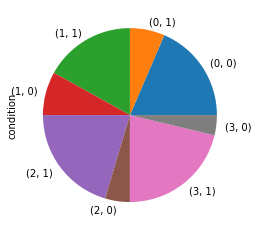

In [28]:
# we can see that ca=0 is less diseased
# and ca=3 is more diseased.
df.groupby(["ca"])["condition"].value_counts(normalize=True).plot.pie();

In [29]:
df.sample(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
170,65,0,3,150,225,0,2,114,0,1.0,1,3,2,1
161,67,1,3,120,229,0,2,129,1,2.6,1,2,2,1


In [30]:
# MODEL
#PYCARET
!pip3 install pycaret

!pip install jinja2

!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the sou

In [31]:
from pycaret.classification import *

In [32]:

clf = setup(data=df, target="condition", session_id=1229, normalize=True)

,Description,Value
0,session_id,1229
1,Target,condition
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(297, 14)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='condition',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_st...
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('du

In [33]:
# Our best model is Logistic Regression according to pycaret

compare_models(sort="AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8321,0.9046,0.7944,0.8517,0.8175,0.6620,0.6694,0.616
rf,Random Forest Classifier,0.8321,0.9046,0.8056,0.8462,0.8210,0.6628,0.6690,0.648
et,Extra Trees Classifier,0.8321,0.9022,0.7856,0.8501,0.8092,0.6610,0.6696,0.561
lda,Linear Discriminant Analysis,0.8464,0.8974,0.7844,0.8962,0.8281,0.6901,0.7047,0.025
nb,Naive Bayes,0.7638,0.8891,0.5489,0.9181,0.6665,0.5130,0.5615,0.033
knn,K Neighbors Classifier,0.8126,0.8815,0.7656,0.8273,0.7910,0.6225,0.6289,0.147
lightgbm,Light Gradient Boosting Machine,0.7740,0.8683,0.7444,0.7668,0.7526,0.5451,0.5489,0.187
ada,Ada Boost Classifier,0.7833,0.8610,0.7544,0.7823,0.7629,0.5640,0.5711,0.259
gbc,Gradient Boosting Classifier,0.7886,0.8610,0.7244,0.8045,0.7586,0.5726,0.5786,0.173
dt,Decision Tree Classifier,0.7543,0.7521,0.7133,0.7703,0.7290,0.5059,0.5192,0.039


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1229, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1229, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
# Now we will try with firstly Logistic Regression and the other models step by step

In [37]:
X = df.drop("condition", axis=1)

In [39]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0


In [43]:
y = df["condition"]
y.head(5), y.shape

(0    0
 1    0
 2    0
 3    1
 4    0
 Name: condition, dtype: int64, (297,))

In [38]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0


In [45]:
# train_test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=42)

In [52]:
print(f"Shape of X_train= {X_train.shape}\nShape of X_test= {X_test.shape}\nShape of y_train= {y_train.shape}\nShape of y_test= {y_test.shape}")

Shape of X_train= (237, 13)
Shape of X_test= (60, 13)
Shape of y_train= (237,)
Shape of y_test= (60,)


In [53]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
273,46,1,3,140,311,0,0,120,1,1.8,1,2,2
259,51,0,3,130,305,0,0,142,1,1.2,1,0,2
30,59,1,1,140,221,0,0,164,1,0.0,0,0,0
22,34,1,0,118,182,0,2,174,0,0.0,0,0,0
277,45,1,3,142,309,0,2,147,1,0.0,1,3,2


In [54]:
y_train.head()

273    1
259    1
30     0
22     0
277    1
Name: condition, dtype: int64

In [57]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
167,66,0,3,178,228,1,0,165,1,1.0,1,2,2
211,59,1,3,140,177,0,0,162,1,0.0,0,1,2
63,41,1,1,135,203,0,0,132,0,0.0,1,0,1
154,37,0,2,120,215,0,0,170,0,0.0,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2


In [58]:
y_test.head()

167    1
211    1
63     0
154    0
5      0
Name: condition, dtype: int64

In [62]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
lr_pred = lr_model.predict(X_test)
lr_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [75]:
y_test= np.array(y_test)
type(y_test)

numpy.ndarray

In [76]:
for i in range(len(y_test)):
  print(f"Actual Value={y_test[i]}, Predicted Value={lr_pred[i]}")

Actual Value=1, Predicted Value=1
Actual Value=1, Predicted Value=1
Actual Value=0, Predicted Value=0
Actual Value=0, Predicted Value=0
Actual Value=0, Predicted Value=1
Actual Value=0, Predicted Value=0
Actual Value=1, Predicted Value=1
Actual Value=1, Predicted Value=1
Actual Value=0, Predicted Value=1
Actual Value=0, Predicted Value=0
Actual Value=0, Predicted Value=0
Actual Value=0, Predicted Value=1
Actual Value=0, Predicted Value=0
Actual Value=0, Predicted Value=0
Actual Value=0, Predicted Value=0
Actual Value=1, Predicted Value=0
Actual Value=1, Predicted Value=1
Actual Value=1, Predicted Value=0
Actual Value=1, Predicted Value=1
Actual Value=0, Predicted Value=0
Actual Value=1, Predicted Value=1
Actual Value=1, Predicted Value=1
Actual Value=0, Predicted Value=0
Actual Value=0, Predicted Value=0
Actual Value=0, Predicted Value=0
Actual Value=1, Predicted Value=1
Actual Value=1, Predicted Value=1
Actual Value=1, Predicted Value=1
Actual Value=0, Predicted Value=1
Actual Value=1

In [79]:
# I looked through our model accuracy manually, now I will look through with metrics
lr_report = classification_report(y_test, lr_pred)
print(lr_report)


              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [92]:
# We modelled with Logistic regression but also I want to set up model with other models and I will set up a function
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Random Forest' : RandomForestClassifier()}

def fit_and_score(models,X_train,y_train,X_test,y_test):
    """Fits and evaluates given machine learning models"""
    model_scores = {}
    
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [93]:
model_scores =  fit_and_score(models,
                            X_train = X_train,
                           y_train = y_train,
                           X_test = X_test,
                           y_test = y_test)
model_scores

{'Logistic Regression': 0.7333333333333333,
 'KNN': 0.5666666666666667,
 'Random Forest': 0.7333333333333333}

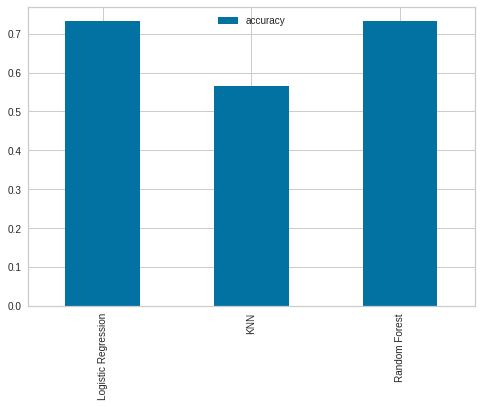

In [94]:
model_compare  = pd.DataFrame(model_scores,index = ['accuracy'])
model_compare.T.plot.bar();

In [95]:
# Hyperparameter Tuning
#we will try to use KNN to fine tune our models..

In [96]:
train_scores = []
test_scores = []

# Create different values for n_neighbours
neighbors = range(1,20)

knn = KNeighborsClassifier()

for i in neighbors:
  knn.set_params(n_neighbors=i)
  knn.fit(X_train, y_train)

  train_scores.append(knn.score(X_train, y_train))
  test_scores.append(knn.score(X_test, y_test))
  



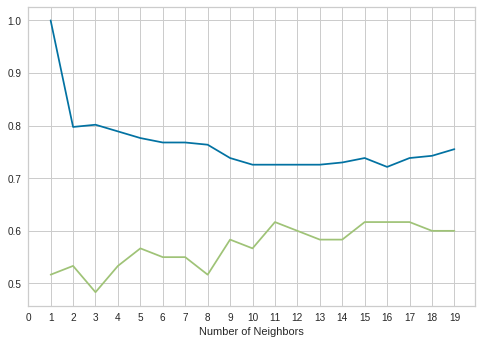

In [101]:
# To visualize train and test scores

plt.plot(neighbors, train_scores, label = 'Train Scores')
plt.plot(neighbors, test_scores , label = 'test Scores')

plt.xticks(np.arange(0,20,1))
plt.xlabel("Number of Neighbors");
          
# n_neighbors = 11 is the max value

In [102]:
print(f"Maximum KNN Score on the test data is {max(test_scores):.3f}")

Maximum KNN Score on the test data is 0.617


In [103]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.6166666666666667